In [45]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import seaborn as sns
import script
import matplotlib.pyplot as plt
from itertools import product

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
df = pd.read_csv('data/sample_data.csv')
df.head()

,space,rent
0,20,13.958824
1,25,11.533805
2,28,14.269547
3,30,18.722680
4,36,19.602674


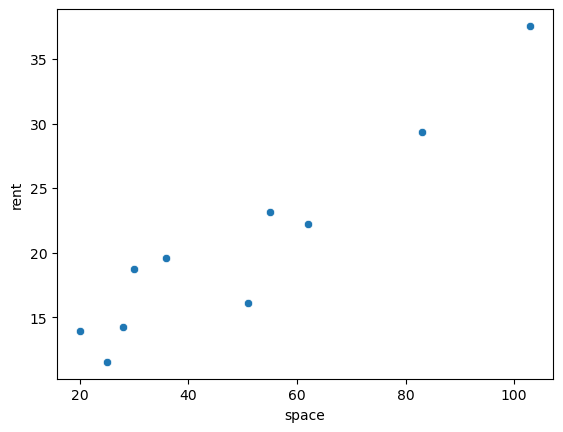

In [4]:
ax = sns.scatterplot(data=df, x='space', y='rent')

In [22]:
script.cost_func(df)

{'傾き0.1のLMS': 143.01346439697724,
 '傾き0.2のLMS': 42.690607234869844,
 '傾き0.3のLMS': 34.45158533848775,
 '傾き0.4のLMS': 45.19442097204609,
 '傾き0.5のLMS': 2.5685638555576564,
 '傾き0.6のLMS': 211.17418892985967,
 '傾き0.7のLMS': 234.59215227753506,
 '傾き0.8のLMS': 750.0699503458856,
 '傾き0.9のLMS': 2055.9867320480203,
 '傾き1.0のLMS': 4281.72236383724}

In [51]:
x = df['space'].values
y = df['rent'].values
script.fix_cost_func(5, 7, x=x, y=y)

[ 20  25  28  30  36  51  55  62  83 103]


138703.20244638805

In [44]:
theta_0 = np.arange(-1, 1.5, 0.5)
theta_1 = np.arange(-20, 30, 10)
z = []
X, Y = np.meshgrid(theta_0, theta_1)
X
Y


# ax = plt.axes(projection='3d')
# ax.plot_surface(X=x, Y=y, Z=z)

array([[-20, -20, -20, -20, -20],
       [-10, -10, -10, -10, -10],
       [  0,   0,   0,   0,   0],
       [ 10,  10,  10,  10,  10],
       [ 20,  20,  20,  20,  20]])

In [53]:
n0 = n1 = 300
min_0 = -20
max_0 = 20
min_1 = -1
max_1 = 1

theta_0 = np.linspace(min_0, max_0, n0)
theta_1 = np.linspace(min_1, max_1, n1)
theta_0_ax, theta_1_ax = np.meshgrid(theta_0, theta_1)

z = [script.fix_cost_func(*param, x, y) for param in list(product(theta_0, theta_1))]
Z = np.array(z).reshape(n0, n1)


array([[9180.43815951, 9109.88103261, 9039.60106593, ...,  407.8256952 ,
         419.58515089,  431.6217668 ],
       [9156.38986166, 9085.92096644, 9015.72923143, ...,  409.9822049 ,
         421.82989227,  433.95473985],
       [9132.37735759, 9061.99669405, 8991.89319072, ...,  412.17450839,
         424.11042743,  436.32350669],
       ...,
       [3611.44522664, 3567.0929073 , 3523.01774817, ..., 2621.66060542,
        2659.62486867, 2697.86629212],
       [3598.02768236, 3553.7635947 , 3509.77666724, ..., 2634.44786869,
        2672.50036362, 2710.83001875],
       [3584.64593187, 3540.47007588, 3496.5713801 , ..., 2647.27092575,
        2685.41165235, 2723.82953916]])

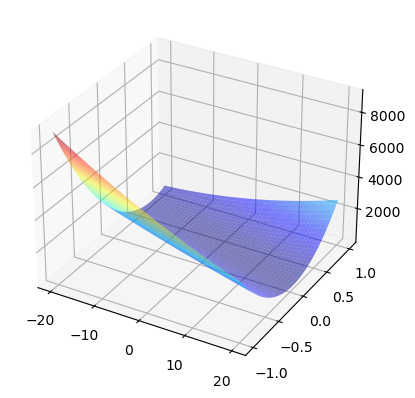

In [55]:
ax = plt.axes(projection='3d')
ax.plot_surface(theta_0_ax.T, theta_1_ax.T, Z, cmap='jet', alpha=0.5)

In [62]:
# 最急降下法
# theta_0_init = np.random.uniform(min_0, max_0) # 本当は値をランダムで設定する
# theta_1_init = np.random.uniform(min_1, max_1)

theta_0_init = -5
theta_1_init = -0.5

def update_theta0(theta_0, theta_1, x, y, alpha=0.05):
  return theta_0 - alpha * 2 * np.mean((theta_0 + theta_1 * x) - y)

def update_theta1(theta_0, theta_1, x, y, alpha=0.05):
  return theta_1 - alpha * 2 * np.mean(((theta_0 + theta_1 * x) - y) * x)

epochs = 100000
alpha = 0.00005

theta_0_hist = []
theta_1_hist = []
theta_0_hist.append(theta_0_init)
theta_1_hist.append(theta_1_init)

for _ in range(epochs):
  updated_theta_0 = update_theta0(theta_0_hist[-1], theta_1_hist[-1], x=x, y=y, alpha=alpha)
  updated_theta_1 = update_theta1(theta_1_hist[-1], theta_1_hist[-1], x=x, y=y, alpha=alpha)
  theta_0_hist.append(updated_theta_0)
  theta_1_hist.append(updated_theta_1)

In [64]:
theta_0_hist

[-5,
 -4.994970259715448,
 -4.991308852925326,
 -4.988585241244735,
 -4.986504359494825,
 -4.984863987703781,
 -4.983525536433974,
 -4.982394024798079,
 -4.981404358592634,
 -4.980511926154095,
 -4.979686153322827,
 -4.978906086402126,
 -4.978157364983348,
 -4.977430147301894,
 -4.976717688400673,
 -4.97601536568865,
 -4.9753200111171445,
 -4.974629453493534,
 -4.973942204810525,
 -4.973257245275061,
 -4.972573875980028,
 -4.971891617934284,
 -4.971210142863901,
 -4.970529225787487,
 -4.969848712514154,
 -4.969168497368582,
 -4.968488507925106,
 -4.967808694545385,
 -4.967129023208139,
 -4.966449470595087,
 -4.96577002072314,
 -4.9650906626363085,
 -4.964411388823881,
 -4.963732194136327,
 -4.963053075042331,
 -4.962374029119605,
 -4.961695054705921,
 -4.961016150659953,
 -4.960337316197367,
 -4.959658550778492,
 -4.958979854031336,
 -4.95830122569882,
 -4.957622665602624,
 -4.956944173618404,
 -4.956265749658805,
 -4.955587393661828,
 -4.9549091055828445,
 -4.954230885389138,
 -4.9535

In [60]:
update_theta1(theta_1_init, theta_0_init, x=x, y=y, alpha=0.00005)

1.1712354098177777